## GR5242 HW1 CY2475

In [172]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import math
from mpl_toolkits.mplot3d import axes3d

### Problem 1 (Markov Chains)
#### a)
##### (i) 
#### Both $$P=(0,0,1,0)^T$$ and $$P=(0,0,0,1)^T$$ are valid equilibria if we start in state 1 or state 2. the equilibria is not unique. This Markov Chain is not irreducible since state 3 and state 4 do not have path to state 1 and state 2.

##### (ii) 
#### This Markov Chain does not have an invariant distribution. If we start in state 1, then $$P_{3n}=(1,0,0)^T$$, $$P_{3n+1}=(0,1,0)^T$$ and $$P_{3n+2}=(0,0,1)^T, n=0,1,2,3...$$Each states cannot reach themselves in every step, so this Markov Chain is not aperiodic.


#### b)
#### It is obviously that gambler's fallacy does not constitute an i.i.d model because the unlucky case and lucky case are not independent. Then because the latest outcome is depend on all the past outcomes or at least a long period of past outcomes, the model should be a Markov model with a large order r. There is no latent variables in this case, so it cannot be a hidden Markov model. 

### Problem 2 (Sampling a d-dimensional Gaussian distribution)
#### a)

In [0]:
def GSAMPLE(mu, Sigma, n):
  d = Sigma.shape[1]
  
  mean = [0]*d
  I_d = np.identity(d)
  g = np.random.multivariate_normal(mean=mean,cov=I_d,size=n)
  
  D, V = sp.linalg.schur(Sigma)
  sqrtD = np.diag(np.sqrt(np.diag(D)))
  
  G = [None]*n
  for x in range(n):
    G[x] = (np.asarray(g[x]*np.matrix.transpose(np.matrix(V)*np.matrix(sqrtD))+np.matrix(mu)))[0]
    
  G = np.asarray(G)
  return(G) 
  

#### b)

In [139]:
mu=[1,2]
Sigma = np.matrix([[2,1],[1,2]])
n = 1000
  
G = GSAMPLE(mu,Sigma,n)

# Check the type of output
type(G)

numpy.ndarray

In [140]:
# Check mean vectro
np.mean(G, 0)

array([0.96527949, 1.94629143])

In [141]:
# Check variance-covariance matrix
np.cov(G, rowvar=False)

array([[2.04241096, 1.03526707],
       [1.03526707, 2.08337035]])

#### c)

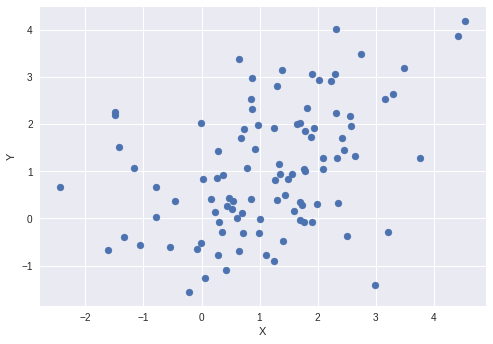

In [243]:
mu=[1,1]
Sigma = np.matrix([[2,1],[1,2]])
n = 100
  
G = GSAMPLE(mu,Sigma,n)

fig = plt.figure()
plt.scatter(x=G[:,0],y=G[:,1])
plt.ylabel('Y')
plt.xlabel('X')
plt.show()


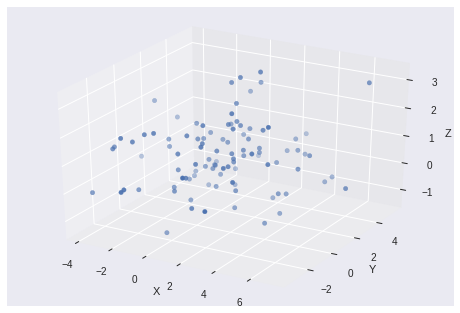

In [228]:
mu=[1,1,1]
Sigma = np.matrix([[5,2,0],[2,3,1],[0,1,1]])
n = 100
  
G = GSAMPLE(mu,Sigma,n)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=G[:,0],ys=G[:,1],zs=G[:,2])
ax.set_zlabel('Z')
ax.set_ylabel('Y')
ax.set_xlabel('X')
plt.show()

### Problem 3 (Sample size)
#### a)


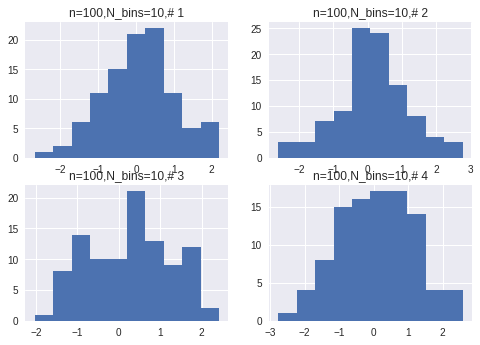

In [260]:
fig = plt.figure()
plt.subplot(221)
plt.hist(np.random.randn(100),bins=10)
plt.title("n=100,N_bins=10,# 1")
plt.subplot(222)
plt.hist(np.random.randn(100),bins=10)
plt.title("n=100,N_bins=10,# 2")
plt.subplot(223)
plt.hist(np.random.randn(100),bins=10)
plt.title("n=100,N_bins=10,# 3")
plt.subplot(224)
plt.hist(np.random.randn(100),bins=10)
plt.title("n=100,N_bins=10,# 4")
plt.show()

#### b)

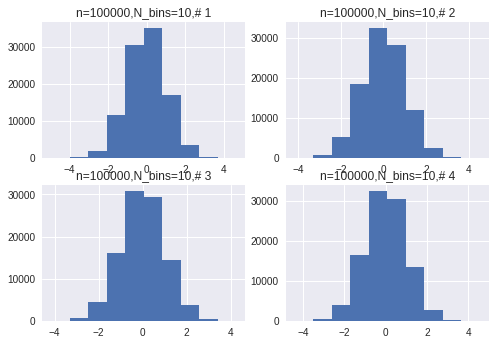

In [261]:
fig = plt.figure()
plt.subplot(221)
plt.hist(np.random.randn(100000),bins=10)
plt.title("n=100000,N_bins=10,# 1")
plt.subplot(222)
plt.hist(np.random.randn(100000),bins=10)
plt.title("n=100000,N_bins=10,# 2")
plt.subplot(223)
plt.hist(np.random.randn(100000),bins=10)
plt.title("n=100000,N_bins=10,# 3")
plt.subplot(224)
plt.hist(np.random.randn(100000),bins=10)
plt.title("n=100000,N_bins=10,# 4")
plt.show()

#### c)

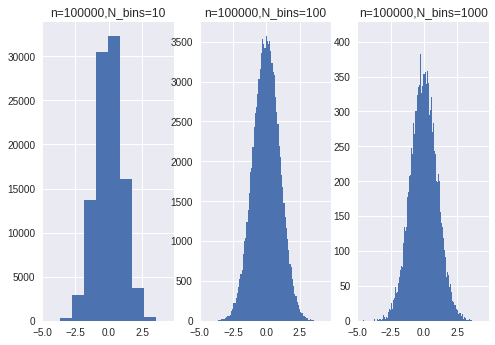

In [257]:
sample = np.random.randn(100000)

fig = plt.figure()
plt.subplot(131)
plt.hist(sample,bins=10)
plt.title("n=100000,N_bins=10")
plt.subplot(132)
plt.hist(sample,bins=100)
plt.title("n=100000,N_bins=100")
plt.subplot(133)
plt.hist(sample,bins=1000)
plt.title("n=100000,N_bins=1000")
plt.show()

#### d)

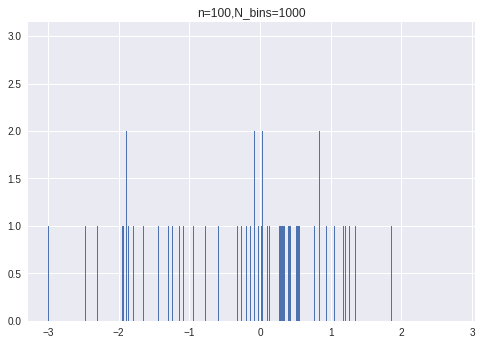

In [258]:
fig = plt.figure()
plt.hist(np.random.randn(100),bins=1000)
plt.title("n=100,N_bins=1000")
plt.show()

#### e)
#### The estimates are more stable and reliable with larger sample size than tha case with smaller sample size. When the number of bins is less than sample size, too small number of bins increases the bias and too large number of bins increase the variance. When the number of bins is larger than sample size, the measurements of estimates become the density of the bins instead of the shape of bins.